In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise_1

In [14]:
min_range = -1000
max_range = +1000
steps = 10000001

range_list = np.linspace(min_range,max_range,steps)
def function(x):
    return x**2 - 2

min_function = np.min(function(range_list))
print(f"The minimum of the functin x^2 -2 is {min_function}")


location = np.where((function(range_list) <=0.001) & (function(range_list) >= -0.001))
root1, root2 = range_list[location[0][0]], range_list[location[0][1]]

print("\nmethod 1:")
print(f"first root {round(root1,2)} is {round(function(root1),2)} and second root {round(root2,2)} is {round(function(root2),2)}")

def bisection(xmin, xmax):
    N = 1000
    for i in range(0,N):
        c = (xmin+xmax) / 2

        if(-0.1 <= function(c) <= 0.1):
            
            print("The root from numerical bisection method: ",round(c,2))
            break
        elif ((function(c))*(function(xmin)) < 0):
            xmax = c
        elif ((function(c))*(function(xmax)) < 0):
            xmin = c
    

step1 = 5
xmin = min_range
xmax = min_range + step1
print("\nmethod 2:")
while True:
    bisection(xmin, xmax)
    
    xmin = xmin + step1
    xmax = xmax + step1
    if xmax >= max_range:
        break

The minimum of the functin x^2 -2 is -2.0

method 1:
first root -1.41 is 0.0 and second root -1.41 is -0.0

method 2:
The root from numerical bisection method:  -1.41
The root from numerical bisection method:  1.41


# Exercise_2

In [8]:
y = [4.1, 4.734, 5.276, 5.726, 6.084, 6.35, 6.524, 6.606, 6.596, 6.494, 6.3, 6.014, 5.636, 5.166, 4.604, 3.95, 3.204, 2.366, 1.436, 0.414]
x = [0., 0.13, 0.26, 0.39, 0.52, 0.65, 0.78, 0.91, 1.04, 1.17, 1.3, 1.43, 1.56, 1.69, 1.82, 1.95, 2.08, 2.21, 2.34, 2.47]
dt, t_list= 0.1, []

g = round(abs((y[5] - 2*y[4] + y[3]) / (dt**2)),2)

# vy1 = (y[1] - y[0]) / dt
# vy2 = (y[2] - y[1]) / dt
# g = (vy2 - vy1) / dt

v0x = (x[1] - x[0]) / (dt)
v0y = round((y[1] - y[0] + 0.5*g*dt**2)/(dt))
V_t = round(np.sqrt(v0x**2 + v0y**2),2)
angle = round(np.arctan(v0y/v0x)*180/np.pi,2)
#angle = np.rad2deg(np.arctan(v0y/v0x))

print(f"g = {g} | v0x = {v0x} | v0y = {v0y} | V_total = {V_t} | angle = {angle}")

g = 9.2 | v0x = 1.3 | v0y = 7 | V_total = 7.12 | angle = 79.48


# Exercise_3

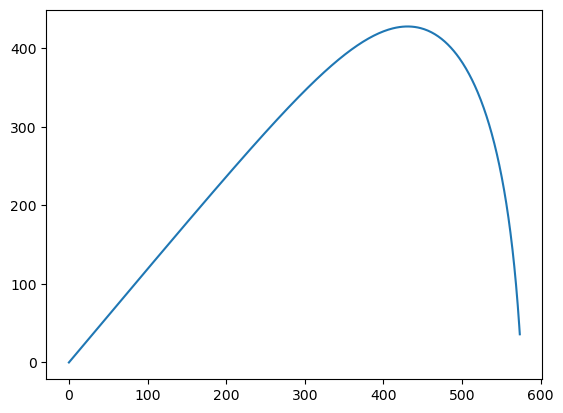

In [9]:
x, y, t , m = 0, 0, 0, 1
v0, g, angle = 1000, 9.8, 50
alpha = 0.005
t0, tf , n = 0, 17.75, 355
dt = (tf - t0) / n

vx = v0*np.cos(angle*np.pi/180)
vy = v0*np.sin(angle*np.pi/180)

def Euler(state, t, dt, derivative, params):
    return state+derivative(state,t, params)*dt

def velocity_x(x, t, params):
    vx = params[0]
    return vx

def velocity_y(y, t, params):
    vy = params[0]
    return vy
    
def acc_x(vx, t, params):
    alpha, v_t, m  = params[0], params[1], params[2]
    
    return - ((alpha*vx*v_t)/m)

def acc_y(vy, t, params):
    g, alpha, v_t, m = params[0], params[1], params[2], params[3]
    
    return (-g - ((alpha*vy*v_t)/m))

x_eu, y_eu = [x], [y]

for step in range(n):
# while y >= 0:
    params_x = [vx]
    params_y = [vy]
    x = Euler(x, t, dt, velocity_x, params_x)
    y = Euler(y, t, dt, velocity_y, params_y)
    
    v_t = np.sqrt(vx**2 + vy**2)
    t = t + dt
    
    params_vx = [alpha, v_t, m]
    params_vy = [g, alpha, v_t, m]
    
    vx = Euler(vx, t, dt, acc_x, params_vx)
    vy = Euler(vy, t, dt, acc_y, params_vy)
    
    x_eu.append(x)
    y_eu.append(y)

plt.plot(x_eu, y_eu)
plt.show()

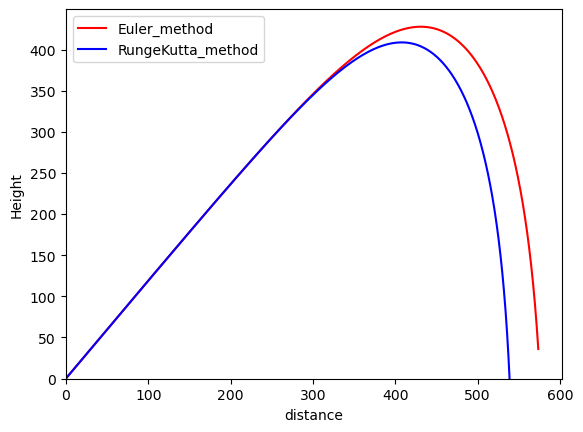

In [10]:
x, y, t , m = 0, 0, 0, 1
v0, g, angle = 1000, 9.8, 50
alpha = 0.0056
t0, tf , n = 0, 17.75, 355
dt = (tf - t0) / n
vx = v0*np.cos(angle*np.pi/180)
vy = v0*np.sin(angle*np.pi/180)

def RungeKuttaSecondOrder(state, t,dt,derivative,params):
    k1 = derivative(state,t, params)
    state2 = Euler(state, t, dt, derivative, params)
    k2 = derivative(state2,t+dt,params)
    return state + 0.5*dt*(k1+k2)


x_rk2 = [x]
y_rk2 = [y]
# for step in range(n):
while y >= 0:
    params_x = [vx]
    params_y = [vy]
    x = RungeKuttaSecondOrder(x, t, dt, velocity_x, params_x)
    y = RungeKuttaSecondOrder(y, t, dt, velocity_y, params_y)
    
    v_t = np.sqrt(vx**2 + vy**2)
    t = t + dt
    
    params_vx = [alpha, v_t, m]
    params_vy = [g, alpha, v_t, m]
    
    vx = RungeKuttaSecondOrder(vx, t, dt, acc_x, params_vx)
    vy = RungeKuttaSecondOrder(vy, t, dt, acc_y, params_vy)
    
    x_rk2.append(x)
    y_rk2.append(y)

plt.plot(x_eu, y_eu, color="r", label="Euler_method")
plt.plot(x_rk2, y_rk2, color="b", label="RungeKutta_method")
plt.xlim(min(x_rk2))
plt.ylim(min(y_rk2))
plt.xlabel("distance")
plt.ylabel("Height")
plt.legend()
plt.show()

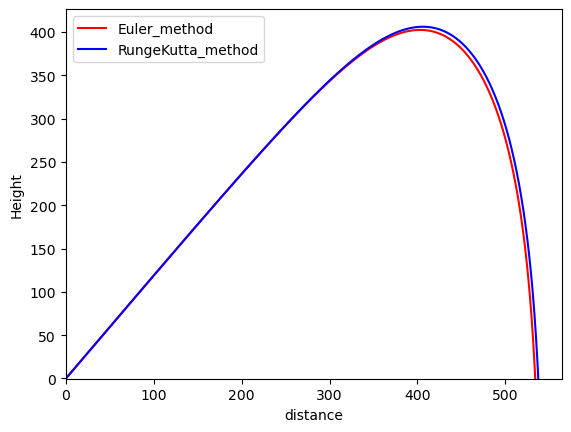

In [12]:
x, y, t , m = 0, 0, 0, 1
v0, g, angle = 1000, 9.8, 50
alpha = 0.0056
t0, tf , n = 0, 17.75, 355
dt = (tf - t0) / n
dt = 0.01


vx = v0*np.cos(angle*np.pi/180)
vy = v0*np.sin(angle*np.pi/180)

def Euler(state, t, dt, derivative, params):
    return state+derivative(state,t, params)*dt


def RungeKuttaSecondOrder(state, t,dt,derivative,params):
    k1 = derivative(state,t, params)
    state2 = Euler(state, t, dt, derivative, params)
    k2 = derivative(state2,t+dt,params)
    return state + 0.5*dt*(k1+k2)

def velocity_x(x, t, params):
    vx = params[0]
    return vx

def velocity_y(y, t, params):
    vy = params[0]
    return vy
    
def acc_x(vx, t, params):
    alpha, v_t, m  = params[0], params[1], params[2]
    
    return - ((alpha*vx*v_t)/m)

def acc_y(vy, t, params):
    g, alpha, v_t, m = params[0], params[1], params[2], params[3]
    
    return (-g - ((alpha*vy*v_t)/m))



def rocket_euler(x, y, t, m, g, angle, alpha, vx, vy, dt, n):
    x_eu, y_eu = [x], [y]

    # for step in range(n):
    while y >= 0:
        params_x = [vx]
        params_y = [vy]
        x = Euler(x, t, dt, velocity_x, params_x)
        y = Euler(y, t, dt, velocity_y, params_y)

        v_t = np.sqrt(vx**2 + vy**2)
        t = t + dt

        params_vx = [alpha, v_t, m]
        params_vy = [g, alpha, v_t, m]

        vx = Euler(vx, t, dt, acc_x, params_vx)
        vy = Euler(vy, t, dt, acc_y, params_vy)

        x_eu.append(x)
        y_eu.append(y)
        
    return x_eu, y_eu


def rocket_rk2(x, y, t, m, g, angle, alpha, vx, vy, dt, n):
    x_rk2, y_rk2 = [x], [y]
    # for step in range(n):
    while y >= 0:
        params_x = [vx]
        params_y = [vy]
        x = RungeKuttaSecondOrder(x, t, dt, velocity_x, params_x)
        y = RungeKuttaSecondOrder(y, t, dt, velocity_y, params_y)

        v_t = np.sqrt(vx**2 + vy**2)
        t = t + dt

        params_vx = [alpha, v_t, m]
        params_vy = [g, alpha, v_t, m]

        vx = RungeKuttaSecondOrder(vx, t, dt, acc_x, params_vx)
        vy = RungeKuttaSecondOrder(vy, t, dt, acc_y, params_vy)

        x_rk2.append(x)
        y_rk2.append(y)
    
    return x_rk2, y_rk2




x_eu, y_eu = rocket_euler(x, y, t, m, g, angle, alpha, vx, vy, dt, n)
x_rk2, y_rk2 = rocket_rk2(x, y, t, m, g, angle, alpha, vx, vy, dt, n)

# print(x_eu[-1],max(y_eu),"e")
# print(x_rk2[-1],max(y_rk2),"r")

plt.plot(x_eu, y_eu, color="r", label="Euler_method")
plt.plot(x_rk2, y_rk2, color="b", label="RungeKutta_method")
plt.xlim(min(x_rk2))
plt.ylim(min(y_rk2))
plt.xlabel("distance")
plt.ylabel("Height")
plt.legend()
plt.show()

# Exercise_4

In [13]:
class PhysicalSystem:
    def __init__(self,state0,params):
        self.state0 = state0
        self.params = params

    def Derivative(self, t):
        pass
    def NextStateRK2(self, dt, t):
        k1 = self.Derivative(t)
        temp_state = self.state0
        self.NextStateEuler(dt, t)
        k2 = self.Derivative(t+dt)
        self.state0 = temp_state + 0.5*dt*(k1+k2)
        return self.state0
    
    def NextStateEuler(self, dt, t):
        self.state0 = self.state0 + self.Derivative(t)*dt
        return self.state0 

class NuclearSystem(PhysicalSystem):
    def Derivative(self,t):
        return -self.state0 / self.params[0]

    
N = 3000
Radium = NuclearSystem(N, [25])
N_list = [N]
t = 0
dt = 0.02
n = 5000
for i in range(1,n):
    N_list.append(Radium.NextStateRK2(dt, t))
    t = t + dt
print(N_list[-1])
print(N_list[1])


54.99091525941087
2997.60096


# Exercise 5

In [14]:
import random
import math
random.seed(42)
N = 1000000
count=0
for iPoint in range(N):
    point = (random.random(),random.random(), random.random(), random.random())
    if point[0]**2+point[1]**2+point[2]**2+point[3]**2 < 1:
        count=count+1

alpha = float(count)/float(N)
volume = 16*alpha
Alpha = volume/math.pi
print(f"from numerical method alpha is {Alpha}")
print("from theorical method alpha is",0.5*math.pi)

from numerical method alpha is 1.5718753334737057
from theorical method alpha is 1.5707963267948966


# Exercise 6

In [15]:
import random
import math
# random.seed(42)
N = 1000000
count=0
r = 0.5
a = 0.5

for iPoint in range(N):
    point = (random.random(), random.random(), random.random())
    x = point[0]
    y = point[1]
    z = point[2]
    if (x-a)**2 + z**2 < r**2 and y<1:
        count=count+1

alpha = float(count)/float(N)
volume = 4*alpha
print(volume)
print(math.pi*(0.5**2)*2)

1.5722
1.5707963267948966


In [16]:
import random
import math
random.seed(42)
N = 1000000
count=0
r_s = 1
r_c = 0.5
a = 0.5
h = 1

for iPoint in range(N):
    point = (random.random(),random.random(), random.random())
    x = point[0]
    y = point[1]
    z = point[2]
    if x**2 + y**2 + z**2 < r_s**2:
        if (x - a)**2 + z**2 < r_c**2 and y < h :
            count=count+1

alpha = float(count)/float(N)
volume = 4*alpha
print(volume)

1.207064
